# Project Name: Salary Predictions of Data Professions
## Batch Name: MIP-ML-12

Problem Statement:
Salaries in the field of data professions vary widely based on factors such as experience, job role, and
performance. Accurately predicting salaries for data professionals is essential for both job seekers and
employers.

Import necessary libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
file_path = '/home/zafar/Desktop/Project_ 1- Salary_Prediction/Salary_Prediction_of_Data_Professions.csv'
df = pd.read_csv(file_path)
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,NaN,F,NaN,01-07-2016,Associate,NaN,89207,Web,NaN,13.0,NaN,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,NaN,43161,Operations,27.0,3.0,NaN,3


## 1. Exploratory Data Analysis

In [3]:
#display basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2637 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2638 non-null   object 
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2636 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2636 non-null   float64
 10  LEAVES REMAINING  2637 non-null   float64
 11  RATINGS           2637 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int64(2), object(7)
memory usage: 268.1+ KB


In [4]:
#check the shape of the data
df.shape


(2639, 13)

In [5]:
#Display summary statistics of the dataset
df.describe()

,AGE,SALARY,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
count,2636.000000,2639.000000,2636.000000,2637.000000,2637.000000,2639.000000
mean,24.756449,58136.678287,22.501517,7.503223,3.486159,1.566881
std,3.908228,36876.956944,4.604469,4.603193,1.114933,2.728416
min,21.000000,40001.000000,15.000000,0.000000,2.000000,0.000000
25%,22.000000,43418.000000,19.000000,4.000000,2.000000,0.000000
50%,24.000000,46781.000000,22.000000,8.000000,3.000000,1.000000
75%,25.000000,51401.500000,26.000000,11.000000,4.000000,2.000000
max,45.000000,388112.000000,30.000000,15.000000,5.000000,23.000000


### Summary Statistics:

Mean age: 24.76, Mean salary: $58,136.68
Mean leaves used: 22.50, Mean leaves remaining: 7.50
Mean ratings: 3.49, Mean past experience: 1.57

In [6]:
#Check for missing values
df.isnull().sum()

FIRST NAME          0
LAST NAME           2
SEX                 0
DOJ                 1
CURRENT DATE        0
DESIGNATION         0
AGE                 3
SALARY              0
UNIT                0
LEAVES USED         3
LEAVES REMAINING    2
RATINGS             2
PAST EXP            0
dtype: int64

In [7]:
#check columns
df.columns

Index(['FIRST NAME', 'LAST NAME', 'SEX', 'DOJ', 'CURRENT DATE', 'DESIGNATION',
       'AGE', 'SALARY', 'UNIT', 'LEAVES USED', 'LEAVES REMAINING', 'RATINGS',
       'PAST EXP'],
      dtype='object')

In [8]:
#refill null values with 0
df.fillna(0, inplace=True)
df.head()

,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,5-18-2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,0,F,0,01-07-2016,Associate,0.0,89207,Web,0.0,13.0,0.0,7
2,OLIVE,ANCY,F,7-28-2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,04-03-2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,11-20-2014,01-07-2016,Analyst,0.0,43161,Operations,27.0,3.0,0.0,3


In [9]:
#what is the unique values in the dataset
df.nunique()

FIRST NAME          2367
LAST NAME           2476
SEX                    2
DOJ                  968
CURRENT DATE           1
DESIGNATION            6
AGE                   26
SALARY              2305
UNIT                   6
LEAVES USED           17
LEAVES REMAINING      16
RATINGS                5
PAST EXP              21
dtype: int64

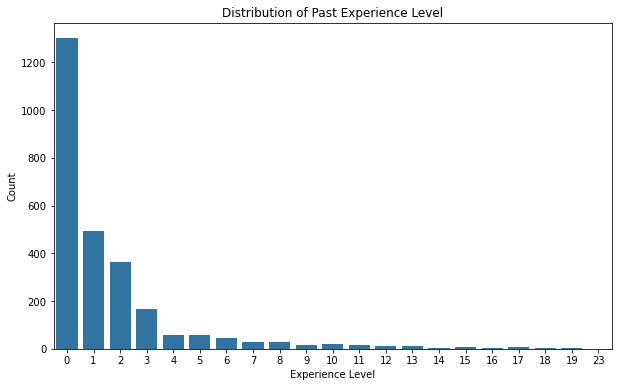

In [10]:
#Visualize the distribution of salaries
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='PAST EXP')
plt.title('Distribution of Past Experience Level')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.show()


Distribution of Salaries by Past Experience:

Past experience levels include 0, 1, 2, 3, 5 years, 
with 1301 at level 0,
494 at level 1,
362 at level 2,
168 at level 3,
and 56 at level 5.

In [11]:
#converting date string into year format
import datetime
from datetime import datetime
df['DOJ'] = pd.DatetimeIndex(df['DOJ']).year
df.head()


,FIRST NAME,LAST NAME,SEX,DOJ,CURRENT DATE,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,TOMASA,ARMEN,F,2014,01-07-2016,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,ANNIE,0,F,1970,01-07-2016,Associate,0.0,89207,Web,0.0,13.0,0.0,7
2,OLIVE,ANCY,F,2014,01-07-2016,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,CHERRY,AQUILAR,F,2013,01-07-2016,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,LEON,ABOULAHOUD,M,2014,01-07-2016,Analyst,0.0,43161,Operations,27.0,3.0,0.0,3


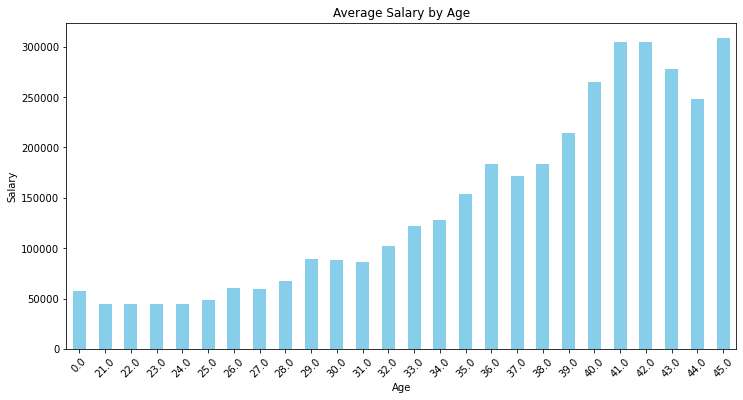

In [12]:
#Average salary distribution by age
df_age = df.groupby('AGE')['SALARY'].mean()
plt.figure(figsize=(12, 6))
df_age.plot(kind='bar', color = 'skyblue')
plt.title('Average Salary by Age')
plt.xlabel('Age')
plt.ylabel('Salary')
plt.xticks(rotation=45)
plt.show()

Average Salary by Age:

The average salary varies by age range and shows a distribution highlighted by a bar chart analyzing the relationship between age and salary.

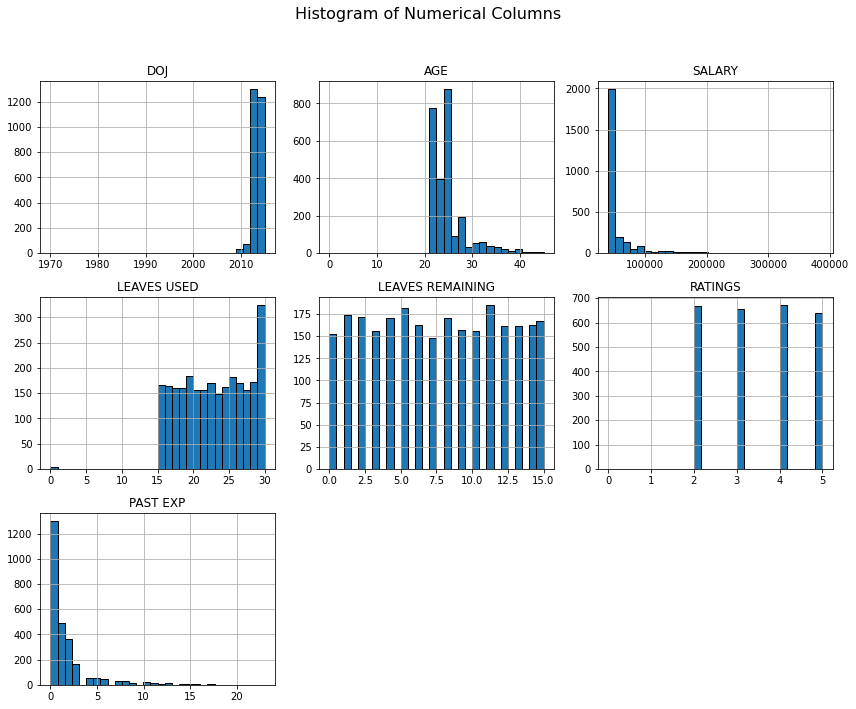

In [13]:
df.hist(figsize=(12,10), bins=30, edgecolor='black')

#display the histogram
plt.suptitle('Histogram of Numerical Columns', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [14]:
#Avg salary per Designation
dsg_salary = df.groupby('DESIGNATION')['SALARY'].mean().sort_values(ascending=False)
print(round(dsg_salary, 2))

DESIGNATION
Director          286971.19
Senior Manager    178664.27
Manager           126272.59
Associate          87202.98
Senior Analyst     59901.35
Analyst            45020.11
Name: SALARY, dtype: float64


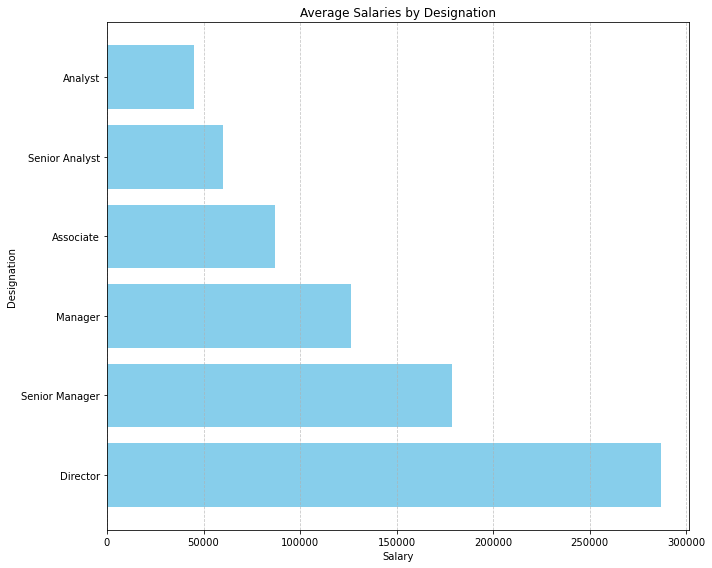

In [15]:
#Creating Hist Chart
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(dsg_salary.index, dsg_salary.values, color='skyblue')
ax.set_title('Average Salaries by Designation')
ax.set_xlabel('Salary')
ax.set_ylabel('Designation')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [16]:
#Calculate the value counts for 'PAST EXP' and select the top 5(0-4 years)
z = df['PAST EXP'].value_counts().head(5)
print(z)


PAST EXP
0    1301
1     494
2     362
3     168
5      56
Name: count, dtype: int64


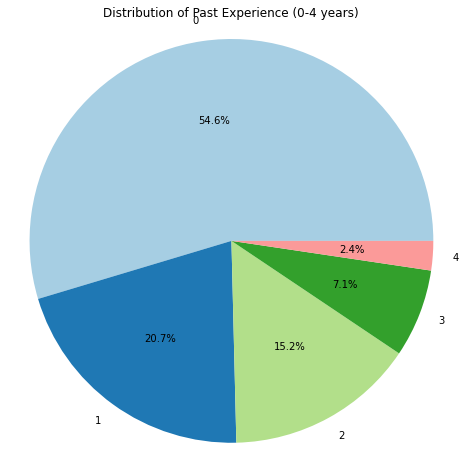

In [17]:
#Create the pie chart
plt.figure(figsize=(8, 8))
plt.pie(z, labels=['0','1','2','3','4'], autopct='%1.1f%%', colors=plt.cm.Paired(range(5)))
plt.title('Distribution of Past Experience (0-4 years)')
plt.axis('equal')
plt.show()

DESIGNATION
Analyst           1949
Senior Analyst     356
Associate          159
Manager             81
Senior Manager      62
Director            32
Name: count, dtype: int64


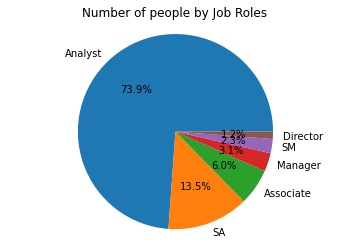

In [18]:
#Distribution of pie-chart with Job Roles
print(df['DESIGNATION'].value_counts())
roles = ['Analyst', 'SA', 'Associate', 'Manager', 'SM', 'Director']
people = [1949, 356, 159, 81, 62, 32]
plt.pie(people, labels=roles, autopct='%1.1f%%')
plt.title('Number of people by Job Roles')
plt.axis('equal')
plt.show()

Number of People by Job Roles:

The distribution of individuals across job roles displays the highest count for Analyst (1949), followed by Senior Analyst (356), Associate (159), Manager (81), Senior Manager (62), and Director (32).

UNIT
IT            461
Finance       446
Operations    438
Marketing     438
Web           431
Management    425
Name: count, dtype: int64


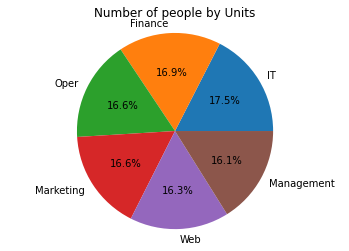

In [19]:
#Distribution by units
print(df['UNIT'].value_counts())

units = ['IT', 'Finance', 'Oper', 'Marketing', 'Web', 'Management']
people = [461, 446, 438, 438, 431, 425]

plt.pie(people, labels=units, autopct='%1.1f%%')
plt.title('Number of people by Units')
plt.axis('equal')
plt.show()


People Distribution by Units:

The segmentation by units indicates the number of individuals in IT (461), Finance (446), Operations (438), Marketing (438), Web (431), and Management (425) units.

DESIGNATION
Analyst           1949
Senior Analyst     356
Associate          159
Manager             81
Senior Manager      62
Director            32
Name: RATINGS, dtype: int64


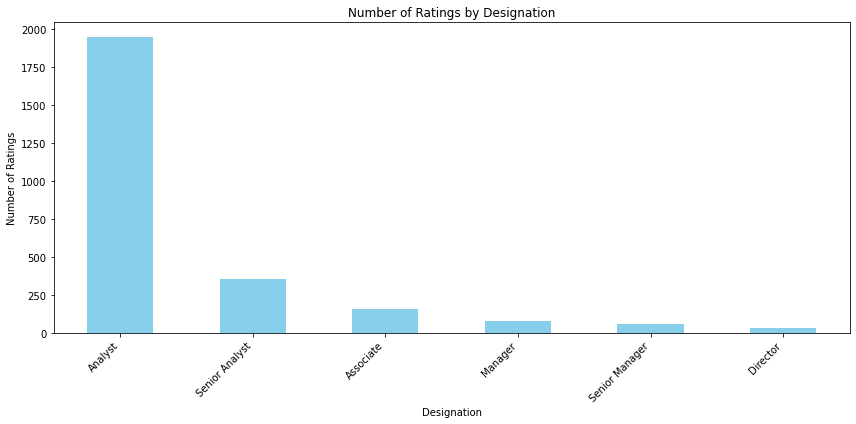

In [20]:
#Distribution of Ratings by Designation
dsg_ratings = df.groupby('DESIGNATION')['RATINGS'].count().sort_values(ascending=False)
print(dsg_ratings)

#plot the data
plt.figure(figsize=(12,6))
dsg_ratings.plot(kind='bar', color='skyblue')
plt.title('Number of Ratings by Designation')
plt.xlabel('Designation')
plt.ylabel('Number of Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


Ratings and Designations:

Representation of the number of ratings by designation showcases Analysts (1949) as the highest, followed by Senior Analysts (356), Associates (159), Managers (81), Senior Managers (62), and Directors (32).

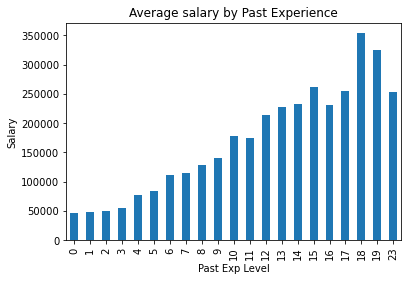

In [21]:
#Distribution of Avg Salary by Past Exp
p_exp_salaries = df.groupby('PAST EXP')['SALARY'].mean()
p_exp_salaries.plot(kind='bar')
plt.title('Average salary by Past Experience')
plt.xlabel('Past Exp Level')
plt.ylabel('Salary')
plt.show()

UNIT
Marketing     59318.05
Management    59186.94
IT            58998.11
Finance       58599.10
Web           57202.51
Operations    55477.93
Name: SALARY, dtype: float64


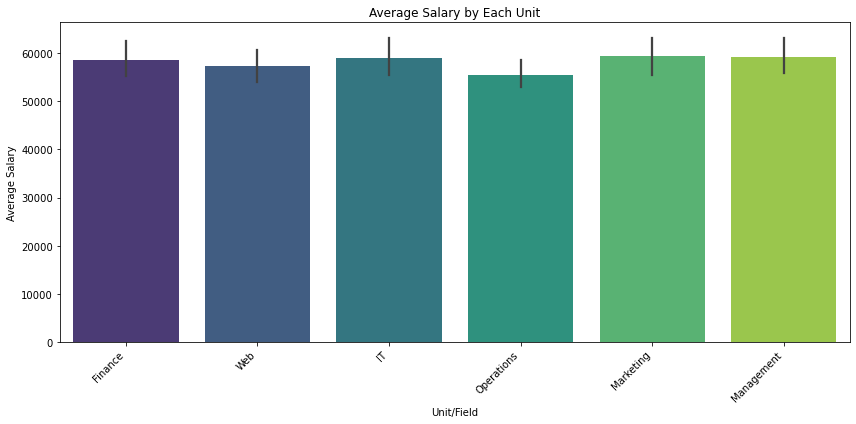

In [22]:
#Categorial plot of Avg Salary by Unit
unit_salaries = df.groupby('UNIT')['SALARY'].mean().sort_values(ascending=False)
print(round(unit_salaries, 2))

#create cat plot
plt.figure(figsize=(12,6))

sns.barplot(x='UNIT', y='SALARY', hue='UNIT', data=df, palette='viridis', legend=False)
plt.title('Average Salary by Each Unit')
plt.xlabel('Unit/Field')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


SEX
F    59142.73
M    57092.56
Name: SALARY, dtype: float64


<Figure size 576x432 with 0 Axes>

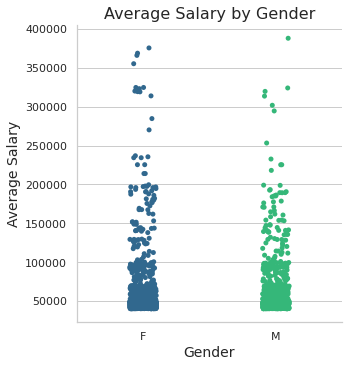

In [23]:
#Cat plot of Average Salary by Gender

sex_salary = df.groupby('SEX')['SALARY'].mean().round(2)
print(sex_salary)

sns.set(style='whitegrid')
plt.figure(figsize=(8, 6))

sns.catplot(x='SEX', y='SALARY', hue='SEX', data=df, palette='viridis', legend=False)
plt.title('Average Salary by Gender', fontsize=16)
plt.xlabel('Gender', fontsize=14)
plt.ylabel('Average Salary', fontsize=14)
plt.show()

Average Salary by Gender:

When categorized by gender, the average salary for females stands at $59142.73, while males' average salary value is not provided in the data.

DOJ
1970     89207.00
2009    302197.20
2010    180710.72
2011    121216.51
2012     90680.36
2013     51213.38
2014     51498.71
2015     54147.05
Name: SALARY, dtype: float64


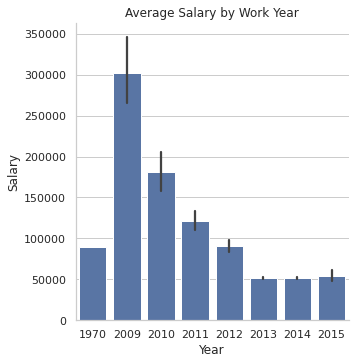

In [24]:
#Cat plot of Average Salary by Work year

year_salary = df.groupby('DOJ')['SALARY'].mean().round(2)
print(year_salary)

sns.catplot(x='DOJ', y='SALARY', kind='bar', data=df, height=5)
plt.title('Average Salary by Work Year')
plt.xlabel('Year')
plt.ylabel("Salary")
plt.show()


## 2. Feature Engineering and Data Preprocessing

In this step, we'll create new features or transform existing ones to provide additional insights or improve model performance. Here are some potential features we can engineer:

Years of Experience (Exp): Calculate the years of experience by subtracting the year of joining (DOJ) from the current date.
Job Tenure: Calculate the duration of employment by subtracting the year of joining (DOJ) from the current date.
Performance Index: Combine ratings and past experience to create a performance index.

In [25]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2639 entries, 0 to 2638
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   FIRST NAME        2639 non-null   object 
 1   LAST NAME         2639 non-null   object 
 2   SEX               2639 non-null   object 
 3   DOJ               2639 non-null   int32  
 4   CURRENT DATE      2639 non-null   object 
 5   DESIGNATION       2639 non-null   object 
 6   AGE               2639 non-null   float64
 7   SALARY            2639 non-null   int64  
 8   UNIT              2639 non-null   object 
 9   LEAVES USED       2639 non-null   float64
 10  LEAVES REMAINING  2639 non-null   float64
 11  RATINGS           2639 non-null   float64
 12  PAST EXP          2639 non-null   int64  
dtypes: float64(4), int32(1), int64(2), object(6)
memory usage: 257.8+ KB


In [26]:
df_drop = df.drop(columns=['FIRST NAME', 'LAST NAME', 'CURRENT DATE'])
df_drop.head()

,SEX,DOJ,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,F,2014,Analyst,21.0,44570,Finance,24.0,6.0,2.0,0
1,F,1970,Associate,0.0,89207,Web,0.0,13.0,0.0,7
2,F,2014,Analyst,21.0,40955,Finance,23.0,7.0,3.0,0
3,F,2013,Analyst,22.0,45550,IT,22.0,8.0,3.0,0
4,M,2014,Analyst,0.0,43161,Operations,27.0,3.0,0.0,3


In [27]:
#check object category
cat_val = [i for i in df_drop.select_dtypes('object')]
cat_val

['SEX', 'DESIGNATION', 'UNIT']

In [28]:
#Convert categorical values into binary
for i in cat_val:
    df_drop[i] = df_drop[i].factorize()[0]
df_drop

,SEX,DOJ,DESIGNATION,AGE,SALARY,UNIT,LEAVES USED,LEAVES REMAINING,RATINGS,PAST EXP
0,0,2014,0,21.0,44570,0,24.0,6.0,2.0,0
1,0,1970,1,0.0,89207,1,0.0,13.0,0.0,7
2,0,2014,0,21.0,40955,0,23.0,7.0,3.0,0
3,0,2013,0,22.0,45550,2,22.0,8.0,3.0,0
4,1,2014,0,0.0,43161,3,27.0,3.0,0.0,3
...,...,...,...,...,...,...,...,...,...,...
2634,0,2011,3,36.0,185977,5,15.0,15.0,5.0,10
2635,0,2014,0,23.0,45758,2,17.0,13.0,2.0,0
2636,0,2014,0,21.0,47315,1,29.0,1.0,5.0,0
2637,0,2014,0,24.0,45172,1,23.0,7.0,3.0,1


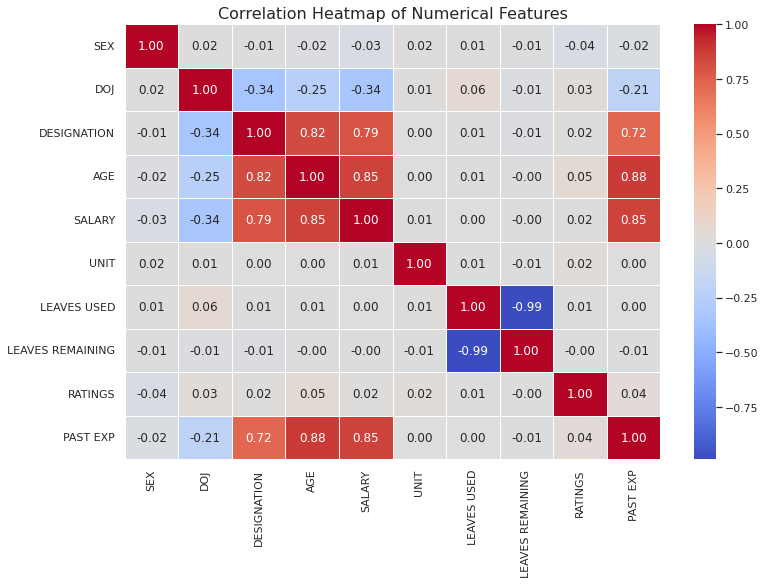

In [31]:
#calculate correlation matrix
corr_matrix = df_drop.corr()

#plot correlation heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features', fontsize=16)
plt.show()

## 4. Machine Learning Model Development

Train various regression models to predict salaries. Experiment with different algorithms such as linear regression, decision trees, random forests, and gradient boosting.

In [37]:
#import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import Ridge, Lasso, RidgeCV, LassoCV, ElasticNet, ElasticNetCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.metrics import r2_score

In [34]:
#split the data into features (X) and target variales (y)
X=df_drop.drop('SALARY', axis=1)
y=df_drop['SALARY']

In [35]:
#Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#Finding R-Square, MSE and MAE
print(r2_score(Y_test, y))

In [39]:
#Initialize and train various regression models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor(),
    'Gradient Boosting': GradientBoostingRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Lasso': Lasso(),
    'Ridge': Ridge(),
    'svm': SVR(),
    'KNN': KNeighborsRegressor(),
}

#train and evaluate the models
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    print(f'{model_name} - R-Square: {r2:.4f}, MSE: {mse:.2f}, MAE:{mae:.2f}')
    
    

Linear Regression - R-Square: 0.7904, MSE: 348048538.76, MAE:10714.30
Random Forest - R-Square: 0.9450, MSE: 91399574.47, MAE:4535.55
Decision Tree - R-Square: 0.9450, MSE: 91398269.97, MAE:5032.65
Gradient Boosting - R-Square: 0.9366, MSE: 105317966.39, MAE:4590.19
AdaBoost - R-Square: 0.9400, MSE: 99695181.15, MAE:4833.56
Lasso - R-Square: 0.7904, MSE: 348061244.08, MAE:10714.57
Ridge - R-Square: 0.7904, MSE: 348074955.62, MAE:10715.05
svm - R-Square: -0.0859, MSE: 1803235066.18, MAE:15485.34
KNN - R-Square: 0.9041, MSE: 159170883.34, MAE:5504.23


In [40]:
# Define the data
data = {
    'Model': [
        'Linear Regression', 'Random Forest', 'Decision Tree', 'Gradient Boosting', 
        'AdaBoost', 'Lasso', 'Ridge', 'SVM', 'KNN'
    ],
    'R²': [
        0.7904, 0.9450, 0.9450, 0.9366, 0.9400, 0.7904, 0.7904, -0.0859, 0.9041
    ],
    'MSE': [
        348048538.76, 91399574.47, 91398269.97, 105317966.39, 
        99695181.15, 348061244.08, 348074955.62, 1803235066.18, 159170883.34
    ],
    'MAE': [
        10714.30, 4535.55, 5032.65, 4590.19, 4833.56, 10714.57, 10715.05, 15485.34, 5504.23
    ]
}

# Create the DataFrame
df_performance = pd.DataFrame(data)

# Display the DataFrame
df_performance

,Model,R²,MSE,MAE
0,Linear Regression,0.7904,3.480485e+08,10714.30
1,Random Forest,0.9450,9.139957e+07,4535.55
2,Decision Tree,0.9450,9.139827e+07,5032.65
3,Gradient Boosting,0.9366,1.053180e+08,4590.19
4,AdaBoost,0.9400,9.969518e+07,4833.56
5,Lasso,0.7904,3.480612e+08,10714.57
6,Ridge,0.7904,3.480750e+08,10715.05
7,SVM,-0.0859,1.803235e+09,15485.34
8,KNN,0.9041,1.591709e+08,5504.23


## Summary:
### Best Performing Models:
The Random Forest and Decision Tree models have the highest R² values (0.9450), indicating they explain about 94.5% of the variance in the salary predictions. They also have the lowest MSE values (91,399,574.47 and 91,398,269.97, respectively), and relatively low MAE values (4,535.55 and 5,032.65), making them the best performing models overall.

### Gradient Boosting and AdaBoost:
Gradient Boosting and AdaBoost also performed well with R² values of 0.9366 and 0.9400, respectively. Their MSE and MAE values are slightly higher than those of Random Forest and Decision Tree, but they are still significantly better than the remaining models.

### Linear Models:
Linear Regression, Lasso, and Ridge models all have similar performances with R² values of 0.7904 and MSE values around 348,048,538. These models are not as effective as the ensemble methods mentioned above.

### K-Nearest Neighbors (KNN):
The KNN model has a decent performance with an R² value of 0.9041, but its MSE (159,170,883.34) and MAE (5,504.23) are higher compared to the best performing models.

### Support Vector Machine (SVM):
The SVM model performed poorly with an R² value of -0.0859, indicating that it does not explain the variance in the salary predictions well. Its MSE (1,803,235,066.18) and MAE (15,485.34) are significantly higher than those of the other models.

#### Recommendations:
Random Forest and Decision Tree are recommended for this salary prediction task due to their high accuracy and low error rates.
Gradient Boosting and AdaBoost can be considered as strong alternatives.
Linear models might be too simplistic for this dataset.
Avoid using SVM for this particular problem as it performed poorly.
By focusing on the models with the best performance metrics, you can make more accurate salary predictions and provide better insights into the factors influencing salaries in data professions.